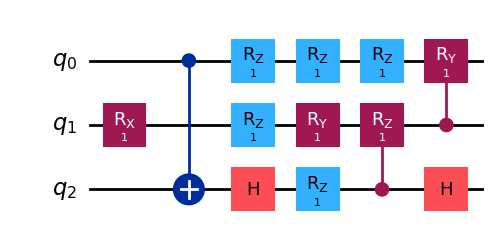

In [5]:
from qoop.core.random_circuit import generate_with_pool

qc = generate_with_pool(3, 5)
qc = qc.assign_parameters([1] * qc.num_parameters)
qc.draw('mpl')

In [11]:
from qimax import converter, circuit, splitter
num_qubits = qc.num_qubits
matrices = []
Us: list[circuit.U] = []
Usm = [] # [U_{0:m-1}, U_{1:m-1}, ... U_{m-1:m-1}]
index = 0
qasm_gates = converter.qasm_to_qasmgates(converter.qc_to_qasm(qc))
qcs = splitter.qasmgates_to_qcs2(qasm_gates)
#qcs.reverse() 
for qasmgates in qcs:
    gates = converter.qasmgates_to_gates(qasmgates)
    params_form, tensor_form = converter.gates_to_string(gates, num_qubits)
    u = circuit.U(params_form, tensor_form, index)
    if u.compare(Us) == False:
        index += 1
        u.to_matrix()
    Us.append(u)
    

In [12]:
U = Us[0].to_matrix() # => Accelarate this function
print(U)
print(U.shape)

[[0.87758255+0.j         0.        +0.j         0.        -0.47942555j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.87758255+0.j         0.        +0.j
  0.        -0.47942555j 0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        -0.47942555j 0.        +0.j         0.87758255+0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.47942555j 0.        +0.j
  0.87758255+0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.87758255+0.j
  0.        +0.j         0.        -0.47942555j]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.87758255+0.j         0.    